In [83]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri
import matplotlib.pylab as pl

from cycler import cycler

[0.e+00 1.e-03 1.e-02 1.e-01 3.e-01 7.e-01 1.e+00 2.e+00 5.e+00] [1.e-02 1.e-01 1.e+00 1.e+01 5.e+01 1.e+02 1.e+03]


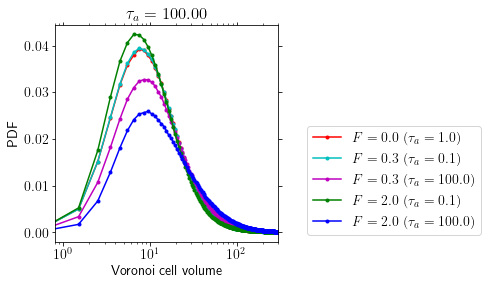

In [93]:
# mpl.rcParams.update({'font.size': 14, 'usetex': True})
mpl.rcParams.update({'font.size':14, 'text.usetex':True})
# print(mpl.rcParams.keys)
fig,ax=plt.subplots(1,1,figsize=(4,4))
# ax.set_prop_cycle(cycler('color', plt.cm.RdBu))
fpath='../../data/SAC_exp/'
ind=4
colors = pl.cm.hot(np.linspace(0,1,15))
colors = pl.cm.Dark2(np.linspace(0,1,8))
colors=['r','c','m','g','b']

for (name,tp) in [('low',0.1)]:#,('mid',1.0), ('high',100)]:
    vcv=[]
    Fs=[]
    Tas=[]
    vcv_eq=0
    count=0
    ax.clear()
    for fname in os.listdir(fpath+'VCV/'):
        if 'VCV' in fname and '.npz' in fname:
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            kb=float(fname.split('_')[ind+7].replace('kb',''))
            Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            dt=float(fname.split('_')[ind+8].replace('dt',''))
            # print(T,F,Ta,Esoft,R0)

            npzfile=np.load(fpath+'VCV/'+fname)
            Fs.append(F)
            Tas.append(Ta)
            
            vcv_avg=np.around(simps(npzfile['hist']*npzfile['bins'], npzfile['bins']),3)
            
            vcv.append(vcv_avg)
            
            if F==0: vcv_eq=vcv_avg
            #if F==0.0 or Ta==tp:
            for fval,taval in [(0.0,1.0),(0.3,0.1),(0.3,100.),(2,0.1),(2,100)]:
                if F!=fval or Ta!=taval: continue
                ax.plot(npzfile['bins'], npzfile['hist'],'.-', label='$F={:.1f}\ (\\tau_a={:.1f})$'.format(F,Ta),color=colors[count])
                count+=1
                ax.set_title('$\\tau_a={:.2f}$'.format(Ta))
            # print(vcv_eq)
    ax.legend(loc='lower left',bbox_to_anchor=(1.1,0))
    ax.semilogx()
    ax.set_xlim(0.8,300)
    ax.set_ylabel('PDF')
    ax.set_xlabel('Voronoi cell volume')
    print(np.unique(Fs),np.unique(Tas))
    # fig.savefig(fpath+'plots/VCV_{}Ta.png'.format(name),bbox_inches='tight', dpi=300)


Text(0.5, 1.0, 'Average voronoi cell volume $\\langle V\\rangle/V_{eq}$')

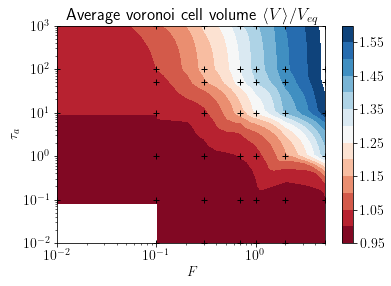

In [95]:
ax.clear()
Xi,Yi=np.meshgrid(np.linspace(0.0,5,50),np.logspace(-2,3,50))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,np.around(np.array(vcv)/vcv_eq, 2))
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(0.95,1.6,0.05),cmap='RdBu')
plt.colorbar()
# plt.contour(Xi, Yi, Zi, levels=[0.98, 1.,1.01])
# plt.contour(Xi,Yi,Xi**2*Yi/0.1, levels=np.logspace(-2,4,10))
plt.plot(Fs,Tas,'k+')
plt.loglog()
plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.xlim(1e-2,5)
plt.ylim(1e-2,1e3)
plt.title('Average voronoi cell volume $\\langle V\\rangle/V_{eq}$')
# plt.savefig(fpath+'/plots/normVCV_contour.png', dpi=300, bbox_inches='tight')

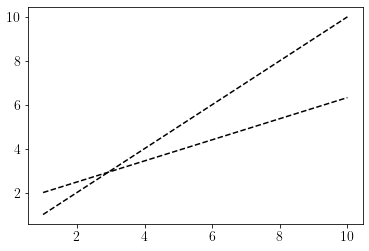

In [68]:
scale=np.array([1,10])
plt.plot(scale, scale,'k--')
plt.plot(scale, 2*scale**0.5,'k--')